In [2]:
import os
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize results from 9 diseases

In [3]:
algo_paths = sorted(glob("../results/9_diseases/*"))
all_dfs = pd.DataFrame()
for algo_path in algo_paths:
    filenames = sorted(glob(f"{algo_path}/benchmark_results_*.csv"))
    
    for fname in filenames:
        disease = os.path.basename(fname).replace('benchmark_results_', '').replace('.csv','').replace('_', '\n')
        algo = os.path.basename(algo_path)
        df = pd.read_csv(fname)
        df['disease'] = disease
        df['algorithm'] = algo
        all_dfs = pd.concat([all_dfs, df])
all_dfs

,test_name,ndgc,time,split_name,ranks,disease,algorithm
0,Arthritis_42_radial_min,0.987671,1.040053,generated_42,"0,1,2,3,4,7",Arthritis,ID-GBA
1,Arthritis_42_boundary_min,0.681339,1.093436,generated_42,"1,2,5,9,12,24",Arthritis,ID-GBA
2,Arthritis_45_radial_min,1.000000,0.948012,generated_45,"0,1,2,3,4,5",Arthritis,ID-GBA
3,Arthritis_45_boundary_min,0.858655,1.087566,generated_45,"0,1,4,8,10,16",Arthritis,ID-GBA
4,Arthritis_55_radial_min,1.000000,0.931252,generated_55,"0,1,2,3,4,5",Arthritis,ID-GBA
...,...,...,...,...,...,...,...
5,rwr_ulcerative_colitis_20_rwr,0.264515,2.446618,generated_20,"57,143,295,534,1015,1131,1337,1699,1739,1742,1...",Ulcerative\ncolitis,RWR
6,rwr_ulcerative_colitis_40_rwr,0.266739,2.907518,generated_40,"56,124,264,643,755,1035,1235,1602,1636,1673,18...",Ulcerative\ncolitis,RWR
7,rwr_ulcerative_colitis_18_rwr,0.272295,2.895230,generated_18,"54,58,178,372,1296,1444,1517,1563,1730,1746,17...",Ulcerative\ncolitis,RWR
8,rwr_ulcerative_colitis_22_rwr,0.303561,2.565011,generated_22,"54,56,57,59,217,279,463,1184,1409,1537,1663,18...",Ulcerative\ncolitis,RWR


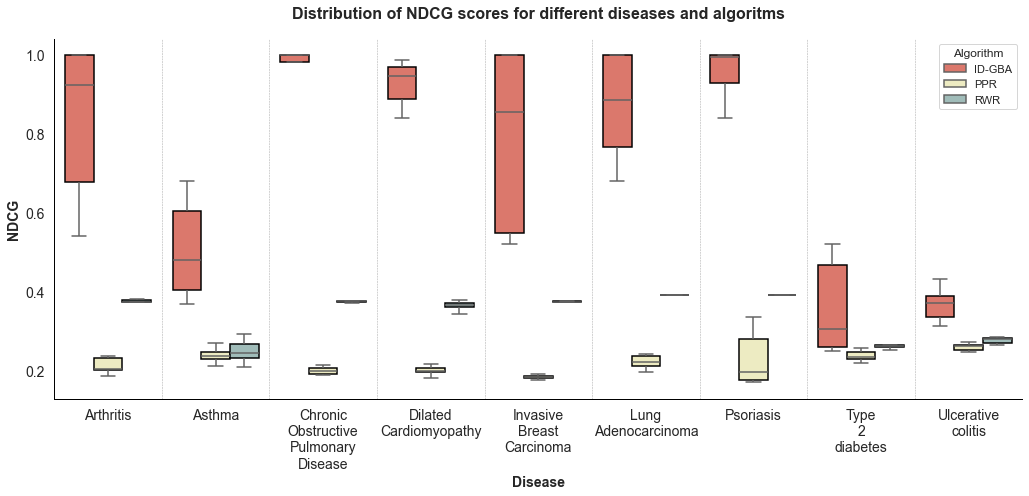

In [4]:
# Conductance values
conductances = {'Arthritis': 0.708, 'Asthma': 0.894, 'Chronic\nObstructive\nPulmonary\nDisease': 0.735,
       'Dilated\nCardiomyopathy': 0.802, 'Invasive\nBreast\nCarcinoma': 0.77,
       'Lung\nAdenocarcinoma': 0.679, 'Psoriasis': 0.756, 'Type\n2\ndiabetes': 0.62,
       'Ulcerative\ncolitis': 0.869}
show_diseases = list(conductances.keys())
conductances = {k: v for k, v in conductances.items() if k in show_diseases}
subset_df = all_dfs[all_dfs['disease'].isin(show_diseases)]
subset_df.rename(columns={'algorithm': 'Algorithm'}, inplace=True)

# Set the figure size and style for Nature-like aesthetics
sns.set(style="white", context="notebook", font="Arial", rc={"axes.edgecolor": "black", "axes.linewidth": 1})

plt.figure(figsize=(len(show_diseases) * 1.6, 7))

# Custom colors for the hue
hue_colors = ['#ed6a5a', '#f4f1bb', '#9bc1bc']

# Create the boxplot with black borders and custom colors
boxplot = sns.boxplot(data=subset_df, x='disease', y='ndgc',
                      hue='Algorithm',  # Different colors for each algorithm
                      palette=hue_colors,  # Custom colors
                      showfliers=False,
                      color='white',  # White fill
                      linewidth=1.5)  # Border width

# Add black borders manually for all boxes
for patch in boxplot.patches:
    patch.set_edgecolor('black')  # Set border color to black
    patch.set_linewidth(1.5)      # Set border width

# Add light vertical lines to separate diseases
for i in range(len(show_diseases) - 1):
    plt.axvline(i + 0.5, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Beautify the axes labels and title
plt.xlabel('Disease', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('NDCG', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Distribution of NDCG scores for different diseases and algoritms', fontsize=16, fontweight='bold', fontname='Arial', pad=20)

# Remove unnecessary spines for a clean look
sns.despine(top=True, right=True, left=False, bottom=False)

# Add conductance values above each box at y=1.01
# for i, (disease, cond) in enumerate(conductances.items()):
#     plt.text(i, 1.01, f'{cond:.3f}', ha='center', va='bottom', fontsize=13, fontname='Arial')

# Adjust tick label size and rotation for clarity
# plt.xticks(fontsize=14, fontname='Arial', rotation=45, ha='right')
plt.yticks(fontsize=14, fontname='Arial')

# Adjust x-tick labels for better alignment
plt.xticks(
    ticks=range(len(show_diseases)),  # Explicitly set ticks for the diseases
    labels=show_diseases,  # Use the disease names as labels
    fontsize=14,  # Adjust font size
    fontname='Arial',  # Set the font
    rotation=0,  # Keep labels upright since they contain newline characters
    ha='center',  # Center-align the labels under the corresponding group
)


# Save and show the plot
plt.savefig('ndcg_9_diseases_boxplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


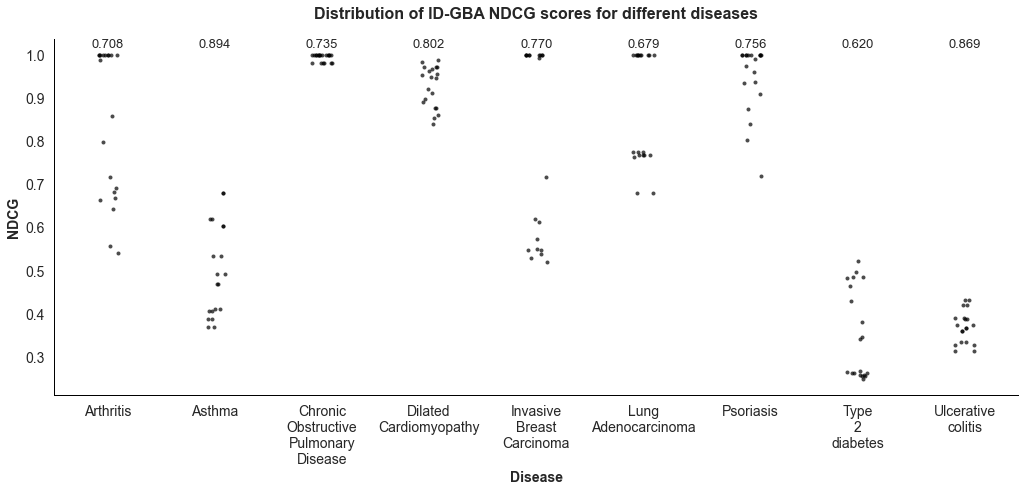

In [5]:
subset_df = all_dfs[all_dfs['algorithm'].isin(['ID-GBA'])]
subset_df = subset_df[subset_df['disease'].isin(show_diseases)]


# Set the figure size and style for Nature-like aesthetics
sns.set(style="white", context="notebook", font="Arial", rc={"axes.edgecolor": "black", "axes.linewidth": 1})

plt.figure(figsize=(len(show_diseases) * 1.6, 7))

# Add light vertical lines to separate diseases
# for i in range(len(show_diseases) - 1):
#     plt.axvline(i + 0.5, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Beautify the axes labels and title
plt.xlabel('Disease', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('NDCG', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Distribution of ID-GBA NDCG scores for different diseases', fontsize=16, fontweight='bold', fontname='Arial', pad=20)

# Remove unnecessary spines for a clean look
sns.despine(top=True, right=True, left=False, bottom=False)

# Add data points with a jittered stripplot for better visibility
sns.stripplot(data=subset_df, x='disease', y='ndgc',
              color='black', size=4, jitter=True, alpha=0.7)

# Add conductance values above each box at y=1.01
for i, (disease, cond) in enumerate(conductances.items()):
    plt.text(i, 1.01, f'{cond:.3f}', ha='center', va='bottom', fontsize=13, fontname='Arial')

plt.yticks(fontsize=14, fontname='Arial')

# Adjust x-tick labels for better alignment
plt.xticks(
    ticks=range(len(show_diseases)),  # Explicitly set ticks for the diseases
    labels=show_diseases,  # Use the disease names as labels
    fontsize=14,  # Adjust font size
    fontname='Arial',  # Set the font
    rotation=0,  # Keep labels upright since they contain newline characters
    ha='center',  # Center-align the labels under the corresponding group
)


# Save and show the plot
plt.savefig('ndcg_9_diseases_idgba.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
